In [1]:
import numpy as np
import random
import math
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns; sns.set()

# Curve Fitting for L. Plantarum GFP/mCherry 
1. Define sigmoid function in two forms 
2. Fit data to sigmoid function to find r and k values 
3. Find dilution rate/or threshold time to keep OD basically constant

In [2]:
#Defining logistic function
def sigmoid(x, L, x0, k):
     y = L / (1 + np.exp(-k*(x-x0)))
     return y
#Defining logistic function, but in log form
def log_sigmoid(x,L,x0,k):
    y=math.log(L)-math.log(np.exp(-k*(math.log(x)-x0)))
    return y

In [22]:
data1=pd.read_excel("4_14_OD.xlsx")
plate=pd.read_excel("4_14_plate.xlsx",index_col=0)
order=['Time','Temp']
for well in plate.itertuples():
    for entry in well[1:]:
        order.append(entry)
print(order)
data1.columns=order
data1

       

['Time', 'Temp', 'GFP 1x', 'GFP 1x', 'GFP 1x', 'GFP 1x', 'GFP 1x', 'GFP 1x', 'GFP 1x', 'GFP 1x', 'GFP 1x', '1x Media', '1x Media', '1x Media', 'MC1 1x', 'MC1 1x', 'MC1 1x', 'MC2 1x', 'MC2 1x', 'MC2 1x', 'MC3 1x', 'MC3 1x', 'MC3 1x', '1x Media', '1x Media', '1x Media', 'GFP 10x', 'GFP 10x', 'GFP 10x', 'GFP 10x', 'GFP 10x', 'GFP 10x', 'GFP 10x', 'GFP 10x', 'GFP 10x', '10x Media', '10x Media', '10x Media', 'MC1 10x', 'MC1 10x', 'MC1 10x', 'MC2 10x', 'MC2 10x', 'MC2 10x', 'MC3 10x', 'MC3 10x', 'MC3 10x', '10x Media', '10x Media', '10x Media', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


,Time,Temp,GFP 1x,GFP 1x,GFP 1x,GFP 1x,GFP 1x,GFP 1x,GFP 1x,GFP 1x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,00:01:48,25.0,0.205,0.202,0.202,0.202,0.197,0.201,0.203,0.199,...,0.118,0.127,0.110,0.113,0.11,0.113,0.123,0.12,0.114,0.11
1,00:06:48,25.0,0.208,0.205,0.204,0.205,0.200,0.202,0.204,0.201,...,0.118,0.127,0.110,0.113,0.11,0.113,0.123,0.12,0.114,0.11
2,00:11:48,25.0,0.210,0.208,0.206,0.207,0.202,0.204,0.206,0.203,...,0.118,0.126,0.110,0.113,0.11,0.113,0.123,0.12,0.114,0.11
3,00:16:48,25.0,0.211,0.209,0.208,0.208,0.203,0.206,0.208,0.204,...,0.118,0.126,0.110,0.113,0.11,0.113,0.123,0.12,0.114,0.11
4,00:21:48,25.1,0.213,0.211,0.210,0.211,0.206,0.208,0.210,0.206,...,0.118,0.126,0.110,0.113,0.11,0.113,0.123,0.12,0.114,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,23:51:48,25.7,1.813,1.800,1.850,1.786,1.793,1.802,1.816,1.852,...,0.118,0.125,0.109,0.112,0.11,0.113,0.122,0.12,0.114,0.11
287,23:56:48,25.7,1.815,1.800,1.850,1.785,1.793,1.801,1.815,1.851,...,0.118,0.125,0.109,0.112,0.11,0.113,0.122,0.12,0.114,0.11
288,1900-01-01 00:01:48,25.6,1.814,1.800,1.850,1.786,1.794,1.802,1.816,1.851,...,0.118,0.125,0.109,0.112,0.11,0.113,0.122,0.12,0.114,0.11
289,1900-01-01 00:06:48,25.6,1.814,1.801,1.850,1.786,1.795,1.801,1.816,1.851,...,0.118,0.126,0.109,0.112,0.11,0.113,0.122,0.12,0.114,0.11


In [26]:
data1['Time']=[5*x for x in range(0,291)]
samples=['GFP','MC1','MC2','MC3']
dilutions=['1x','10x']

for sample in samples:
    for dilution in dilutions:
        data1['NormAve '+sample+' '+dilution]=(data1[sample+' '+dilution].mean(axis=1)-data1[dilution+ ' Media'].mean(axis=1))



[Text(0.5,1,'Growth Rate of L Plantarum on diluted media')]

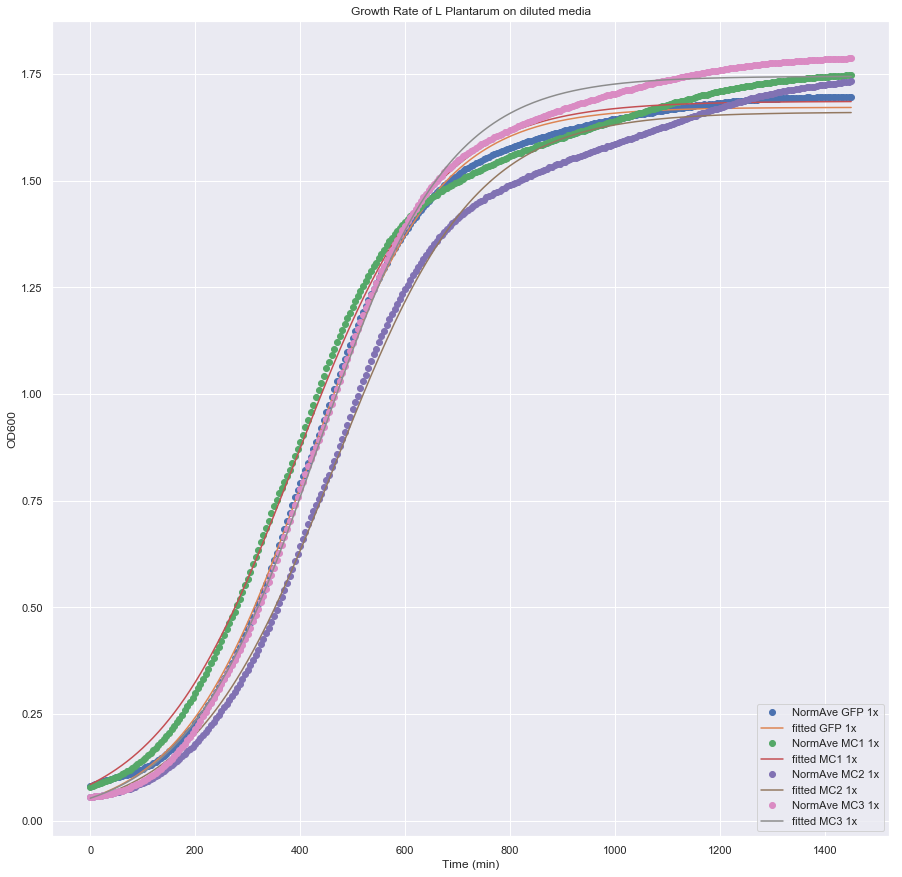

In [29]:
r_vals={}
k_vals={}
threshold_time={}
fig, ax = plt.subplots(1,1,figsize=(15,15), sharex=True, sharey=True) 
for sample in samples:
    for dilution in dilutions[:-1]:
        x_vals=data1['Time'].values
        y_vals=data1['NormAve '+sample+' '+dilution].values 
        ax.plot(data1['Time'],data1['NormAve '+sample+' '+dilution], 'o',label='NormAve '+sample+' '+dilution)
        #gets fit
        try:
            popt, pcov = curve_fit(sigmoid,x_vals,y_vals, p0=[0.5,1000,0.01])
        except RuntimeError:
            pass
        
        r_vals[sample+' '+dilution]=popt[2]
        k_vals[sample+' '+dilution]=popt[0]
        try:
            threshold_time[sample+' '+dilution]=5*data1[data1['NormAve '+sample+' '+dilution].gt(0.05)].index[0]
        except IndexError:
            threshold_time[sample+' '+dilution]=5
        fitted_y=sigmoid(x_vals,*popt)
        ax.plot(x_vals,fitted_y,label="fitted "+sample+' '+dilution)
ax.legend(loc='lower right')
ax.set_xlabel("Time (min)")
ax.set_ylabel("OD600")
ax.set(title='Growth Rate of L Plantarum on diluted media')

In [30]:
print(r_vals)
print(k_vals)
print(threshold_time)
doubling_time={}
for r_val in r_vals:
    doubling_time[r_val]=np.log(2)/(r_vals[r_val])
print(doubling_time)

{'GFP 1x': 0.00823134820411617, 'MC1 1x': 0.007529585338259676, 'MC2 1x': 0.0074727716364063924, 'MC3 1x': 0.0080333005553019}
{'GFP 1x': 1.6722432885656162, 'MC1 1x': 1.6863584500280442, 'MC2 1x': 1.6610213387650183, 'MC3 1x': 1.7450619360037463}
{'GFP 1x': 0, 'MC1 1x': 0, 'MC2 1x': 0, 'MC3 1x': 0}
{'GFP 1x': 84.2082200110706, 'MC1 1x': 92.05648776405972, 'MC2 1x': 92.75637130178319, 'MC3 1x': 86.28423345899525}
